# Exploratory Notebook

Use this notebook to explore the project data using `pandas`, SQL, and Matplotlib!

You will not be submitting this notebook so feel free to try out different "experiments" to figure out what works best.

When you're happy with your code and want to turn it in, copy it into the `final.ipynb` notebook and download that notebook for the PDF submission.

05/19/22
On the surface so far, we have BOM and IMDB which represent data about movies and their revenues.  A joined universe of data that includes movies with budgets and revenues might be extremely valuable as we can then engineer a profit feature.  We could also scrape a website for profit values or utilize an API.  

05/20/22
Hypothesis one: In terms of identifying what types of movies to recommend Microsoft start producing, we should first consider data correlation between ratings/profit and ratings/revenue.  More importantly, I think an evaluation of those same features needs to set against the backdrop of release date, as the entire movie industry may profit model may have changed over time. 

Hypothesis:  
I personally find myself watching more tv shows than movies these days, so a separate analysis might need to be done outside the scope of this one comparing television shows vs. movies.   

update: 05/21/22 
I am starting to think profit/ratings, budget/profit, budget/ratings all mapped over time will be the most valuable information.  In addition, I may try to see if there is a correlation in genre, in particular, action and anime, and profit, to see if there are any synergies with MS existing portfolio of gaming content.    


Side note: I would like to see data for how this venture would impact/accentuate/galvanize the client's other businesses in a cross platform, but I doubt we have time for that kind of analysis.  I will explore the dbs and data and if something (such as its video game content) connects with the movie industry, maybe we can explore those cases. There is evidence of video games turned theatre in recent film, most recently Arcane league of legends, mortal Kombat, sonic the hedgehog, and Halo (a microsoft Xbox game).   



Update: 5/29/2022.  Things have definitely changed. Life got in the way and I lost a couple days to work at Amazon, sleep, and family.  More importantly, my preliminary analysis of the data has yielded some interesting results.  


## CSV and TSV Data

Here is some starter code that opens up some of the CSV and TSV data and loads it into DataFrames:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Bom movie Gross

### 5 columns: 
- title 
- studio 
- domestic gross 
- foriegn gross 
- year 

Perhaps more data exploration will reveal additional features.  

BOM is by IMDB Pro and may be contained within the IMDB database.  
or 
BOM may be an extension of the IMDB database with gross revenue values. This would make sense.  

In [1]:
# we subset by the conditional idiomatically using .loc and then reassign the selected rows that have been halved.  
# TN.loc[(TN['domestic_gross'] == TN['foreign_gross']), ['domestic_gross', 'foreign_gross']] = TN.loc[(TN['domestic_gross'] == TN['foreign_gross']), ['domestic_gross', 'foreign_gross']]/2

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# bom_movie_gross.info()
#ok, so we have quite a few missing values for the foreign gross. 
# This will need to be cleaned up.  

# RT Movie Info
12 columns 
- id 
- synopsis
- rating
- genre
- director
- writer
- theatre_date
- dvd_date
- currency
- box_office
- runtime
- studio

This seems like a much better breakdown of relevant information.  

In [5]:
# rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
# rt_movie_info


Im not sure any good will come from using rtmovieinfo, as we cannot easily ascertain what movie they are referencing. If I have time, I will come back and attempt to associate this data with the larger set.  But it isnt that many individual values. 

In [6]:
# rt_movie_info = rt_movie_info.drop('id', axis = 1)

In [7]:
# rt_movie_info

In [8]:
# rt_movie_info.info()

In [9]:
# rt_movie_info.columns = rt_movie_info.columns.str.strip()

In [10]:
# rt_movie_info.theater_date = pd.to_datetime(rt_movie_info.theater_date)

In [11]:
# rt_movie_info['year'] = pd.DatetimeIndex(rt_movie_info['theater_date']).year

In [12]:
# rt_movie_info.rename(columns={'theater_date': 'release_date'}, inplace=True)

In [13]:
# rt_movie_info.info()

In [14]:
# rt_movie_info.isna().sum()

# Rotten tomatoes reviews
### Initial Columns
id
review
rating
fresh
critic
top_critic
publisher
date

To Do

Doing 
extra row - identify differences in ID.  I am just guessing that each Id is a single movie, differentiated by review. will confirm. 

Done - received encoding error UTF-8 which has to do with the way strings are formatted within the file. Changed encoding from UTF8 to Latin-1 

In [27]:
# rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter="\t", encoding='latin-1')
# rt_reviews

In [28]:
# rt_reviews.info()

In [29]:
# rt_reviews.id.nunique()

Many detailed reviews of 1135 films.  It is going to be very hard to associate the grouped ids without some clear connection to the larger context. 

# RT budgets

In [61]:
rt_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
rt_budgets.iloc[100:105]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
100,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377"
101,2,"Nov 22, 2017",Coco,"$175,000,000","$209,726,015","$798,008,101"
102,3,"Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695"
103,4,"Mar 27, 2009",Monsters vs. Aliens,"$175,000,000","$198,351,526","$381,687,380"
104,5,"Jun 16, 2017",Cars 3,"$175,000,000","$152,901,115","$383,541,369"


In [62]:
rt_budgets.equals(TN)

True

In [31]:
# rt_budgets.iloc[250:255]

In [32]:
# rt_budgets['id'].mean()

The id column is weird in budgets. It just repeats every 100 rows indiscriminately.  Lets drop that column.  

In [33]:
# rt_budgets = rt_budgets.drop('id', axis = 1)
# rt_budgets

In [34]:
#seems to be sorted by budget spent descending.  Consider percentage profit made as a feature.  

In [35]:
# rt_budgets['domestic_gross'].sum() >= rt_budgets['worldwide_gross'].sum() #very odd. 

In [36]:
# rt_budgets.info()

In [37]:
#so no missing or placeholder values yet, worldwide gross is less than domestic gross; however, 
# it seems like there are NAN values in both categories.  There are also some issues with the 
# other columns. 

In [38]:
# rt_budgets.release_date = pd.to_datetime(rt_budgets.release_date)

In [39]:
# rt_budgets['year'] = pd.DatetimeIndex(rt_budgets['release_date']).year

# The Movie DB (not an actual db)

This is a database we can use.  We can rename columns so they correspond to individual movie titles and release dates. 

In [15]:
TMDB = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
TMDB #we dropped the irrelavent first column with method above. 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


There is an extra index column.  Definitely keeping votecount and vote_average, popularity.

In [16]:
TMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [17]:
TMDB['release_date'].head()

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
Name: release_date, dtype: object

In [18]:
TMDB.release_date = pd.to_datetime(TMDB.release_date)  
# we convert date from string to date time.  

In [19]:
TMDB['year'] = pd.DatetimeIndex(TMDB['release_date']).year
# we create a year column in case we need it. 

# we forgot to create movie from title, but we do that later on.  REORGANIZE

In [20]:
TMDB

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [21]:
TMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   year               26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


In [22]:
TMDB.title.value_counts()

Eden                               7
Home                               7
Lucky                              5
Legend                             5
Aftermath                          5
                                  ..
The Pervert's Guide to Ideology    1
Muscle Shoals                      1
Grave Halloween                    1
Doonby                             1
The Church                         1
Name: title, Length: 24688, dtype: int64

Ok, since we know TN and RT Budgets are the same, lets just merge RT Budgets, TMDB, BOM, and RTMovie info.  We can left join on TMDB since that has the most data.   UPDATE: we did not do that and are going to explore TN and SQL first. UPDATE: good thing we did, because we didnt even use RTs and we made TN our base set.  

# The Numbers

In [23]:
TN = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
TN
#looks really similar to RTbudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
TN = TN.drop('id', axis = 1)

In [25]:
# TN.release_date[:4]

Once again, there is an extra index column that just repeats every 100 rows indiscriminately.  update: removed. 

In [26]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB


In [27]:
TN.release_date = pd.to_datetime(TN.release_date)  
# We converting to pd.datetime to make our date calculations accurate. Our analysis will calculate data
# and analyze data against time stamped months and years (refine)

In [28]:
TN['year'] = pd.DatetimeIndex(TN['release_date']).year 
# we will create a year column because in order to join data that does not have a full release date.  


In [29]:
RT_budgets.isna()

NameError: name 'RT_budgets' is not defined

In [30]:
# It seems as though the numbers and RT budgets are the same dataset.  
# Lets perform a similar test
TN['domestic_gross'].sum() >= TN['worldwide_gross'].sum() #very odd. 

True

In [31]:
print(len(TN[TN.worldwide_gross.isna()]))
TN['worldwide_gross'].nunique()

0


5356

In [32]:
TN.sort_values(by=['movie'], ascending=False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
2701,2008-03-07,é·æ±ä¸è (CJ7),"$20,000,000","$206,678","$47,300,771",2008
4756,2008-04-15,Ã l\'intÃ©rieur,"$3,000,000",$0,"$895,932",2008
514,2017-01-20,xXx: Return of Xander Cage,"$85,000,000","$44,898,413","$345,033,359",2017
697,2002-08-09,xXx,"$70,000,000","$141,930,000","$267,200,000",2002
1958,2017-09-15,mother!,"$30,000,000","$17,800,004","$42,531,076",2017
...,...,...,...,...,...,...
3262,1999-03-31,10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950",1999
3447,2015-11-11,10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",2015
4253,2016-03-11,10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016
3954,2009-07-17,(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060",2009


Given that the WW gross number is less than the domestic gross number, WW gross really means "foreign gross".  So we are going to rename ww gross to foreign gross.  

## Comparing RT_Budgets and TN

In [33]:
print(len(rt_budgets[rt_budgets.worldwide_gross.isna()]))
rt_budgets['worldwide_gross'].nunique()

NameError: name 'rt_budgets' is not defined

In [34]:
RT_budget

NameError: name 'RT_budget' is not defined

In [35]:
# TN['movie'].unique

In [36]:
# rt_budgets['movie'].unique

In [37]:
# rt_budgets.info()

In [38]:
# TN.info()

In [39]:
# TN.set_index('movie').join(rt_budgets.set_index('movie'))
# TN.isna().any()

In [40]:
# rt_budgets.isna().any()

In [41]:
# rt_budgets.duplicated(subset='movie').value_counts()

## Analyze TN dataframe

In [88]:
TN.isna().any()

release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
year                 False
dtype: bool

In [89]:
TN.duplicated(subset=['movie', 'release_date']).value_counts()

False    5782
dtype: int64

I think we can safely assume that TN and RT_budgets are identical datasets.   Lets clean BOM movie data and then join it with TN data. 

In [90]:
# first we need to convert domestic_gross from an object to an int
# TN['domestic_gross'] = TN['domestic_gross'].astype(int)
# bom_movie_gross.rename(columns={'title' : 'movie'}, inplace=True)


In [91]:
# TNBOM = TN.merge(bom, on='year', how='outer')

In [92]:
# TNBOM

In [93]:
# TNBOM[TNBOM.duplicated(subset='movie')].value_counts()


Because TN ww gross really means foriegn gross, we can probably just rename that column, and rename title to movie in BOM.  I am thinking we drop the production budget and release date from TN and create a new TN DF.  Then concat the new TN DF with BOM to creat a concatonated TNBOM DF.  Then, we can left join the remaining TN columns 'theatre date and budget' onto the resulting TNBOM later on if we need.  LE

In [94]:
# TN_gross = TN.drop(['release_date', 'production_budget'], axis=1)
# TN_gross.head()

In [95]:
TN.drop_duplicates(subset=['movie', 'release_date'], inplace = True)
TN.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [96]:
TN.duplicated(subset=['movie', 'release_date']).value_counts()

False    5782
dtype: int64

In [97]:
TN_clean_base = TN.copy()

In [98]:
TN_clean_base.rename(columns={'worldwide_gross' : 'foreign_gross'}, inplace=True)
TN_clean_base.head()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [99]:
TN_clean_base['domestic_gross'] = TN_clean_base['domestic_gross'].str.replace(',', '')
TN_clean_base['domestic_gross'] = TN_clean_base['domestic_gross'].str.replace('$', '')
TN_clean_base['domestic_gross'] = TN_clean_base['domestic_gross'].astype(int)

/tmp/ipykernel_66/3366571303.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TN_clean_base['domestic_gross'] = TN_clean_base['domestic_gross'].str.replace('$', '')


In [100]:
TN_clean_base['foreign_gross'] = TN_clean_base['foreign_gross'].str.replace(',', '')
TN_clean_base['production_budget'] = TN_clean_base['production_budget'].str.replace(',', '')

In [101]:
TN_clean_base.production_budget = TN_clean_base.production_budget.map(lambda x: x.strip('$')).astype(int)
TN_clean_base.head()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year
0,2009-12-18,Avatar,425000000,760507625,$2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,$1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,$149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,$1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,$1316721747,2017


In [102]:
TN_clean_base.foreign_gross = TN_clean_base.foreign_gross.map(lambda x: x.strip('$')).astype(int)
TN_clean_base.head()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [103]:
TN_clean_base[TN_clean_base['movie'].isna()]
TN_clean_base.duplicated().sum()

0

In [104]:
TN_clean_base['foreign_gross'] = TN_clean_base['foreign_gross'].astype(int)
TN_clean_base['production_budget'] = TN_clean_base['production_budget'].astype(int)

In [105]:
TN_clean_base['domestic_profit_loss'] = TN_clean_base['domestic_gross'] - TN_clean_base['production_budget']
TN_clean_base['foreign_profit_loss'] = TN_clean_base['foreign_gross'] - TN_clean_base['production_budget']
TN_clean_base['total_gross'] = TN_clean_base['domestic_gross'] + TN_clean_base['foreign_gross']
TN_clean_base['total_profit_loss'] = TN_clean_base['domestic_profit_loss'] + TN_clean_base['foreign_profit_loss'].astype(int)

In [60]:
# # TN_clean_base['total_profit_loss'] = TN_clean_base.assign(millions = lambda x: x(['total_profit_loss']/1000000))
# TN_clean_base['production_budget'] = TN_clean_base.assign(millions = lambda x: x(['total_profit_loss']/1000000))

In [61]:
TN_clean_base.head()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,335507625,2351345279,3536852904,2686852904
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,-169536125,635063875,1286727750,465527750
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-307237650,-200237650,192524700,-507475300
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,128405868,1072413963,1862019831,1200819831
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,303181382,999721747,1936903129,1302903129


In [62]:
TN_clean_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5782 non-null   datetime64[ns]
 1   movie                 5782 non-null   object        
 2   production_budget     5782 non-null   int64         
 3   domestic_gross        5782 non-null   int64         
 4   foreign_gross         5782 non-null   int64         
 5   year                  5782 non-null   int64         
 6   domestic_profit_loss  5782 non-null   int64         
 7   foreign_profit_loss   5782 non-null   int64         
 8   total_gross           5782 non-null   int64         
 9   total_profit_loss     5782 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 496.9+ KB


In [63]:
# TN_clean_base['Total_Profit_loss'] = TN_clean_base['Total_Profit_loss'].astype(int)

In [64]:
TN_clean_base.describe()

,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,1.028557e+07,5.989970e+07,1.333608e+08,7.018527e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,4.992137e+07,1.460889e+08,2.399411e+08,1.867411e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,-3.072376e+08,-2.002376e+08,0.000000e+00,-5.074753e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,-9.132757e+06,-2.189071e+06,6.448924e+06,-7.941690e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,-3.487755e+05,8.550286e+06,4.605855e+07,7.631958e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,1.778144e+07,6.096850e+07,1.506937e+08,7.704505e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,6.306622e+08,2.351345e+09,3.536853e+09,2.686853e+09


The median and mean are firmly in the range of profits.  

In [65]:
TN_clean_base.set_index('release_date')

,movie,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss
release_date,,,,,,,,,
2009-12-18,Avatar,425000000,760507625,2776345279,2009,335507625,2351345279,3536852904,2686852904
2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,-169536125,635063875,1286727750,465527750
2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-307237650,-200237650,192524700,-507475300
2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,128405868,1072413963,1862019831,1200819831
2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,303181382,999721747,1936903129,1302903129
...,...,...,...,...,...,...,...,...,...
2018-12-31,Red 11,7000,0,0,2018,-7000,-7000,0,-14000
1999-04-02,Following,6000,48482,240495,1999,42482,234495,288977,276977
2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,-3662,-3662,2676,-7324


In [66]:
TN_clean_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5782 non-null   datetime64[ns]
 1   movie                 5782 non-null   object        
 2   production_budget     5782 non-null   int64         
 3   domestic_gross        5782 non-null   int64         
 4   foreign_gross         5782 non-null   int64         
 5   year                  5782 non-null   int64         
 6   domestic_profit_loss  5782 non-null   int64         
 7   foreign_profit_loss   5782 non-null   int64         
 8   total_gross           5782 non-null   int64         
 9   total_profit_loss     5782 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 496.9+ KB


now we need to subset total profit and total loss so that we can identify them separately.   

In [67]:
# TN_clean_profits = TN_clean_base[(TN_clean_base['total_profit_loss'] >= 0)]
# TN_clean_losses = TN_clean_base[(TN_clean_base['total_profit_loss'] < 0)]

In [68]:
# TN_clean_base.head()

In [69]:
# TN_clean_base['total_profit'] = TN_clean_base['total_profit'].astype(int)
# TN_clean_base['total_loss'] = TN_clean_base['total_loss'].astype(int)

In [108]:
loss_freq = TN_clean_base[ TN_clean_base['total_profit_loss'] < 0]
profit_freq = TN_clean_base[ TN_clean_base['total_profit_loss'] >= 0]
loss_freq_adjusted = loss_freq[loss_freq['total_profit_loss'] <= loss_freq['total_profit_loss'].quantile(.95)]
profit_freq_adjusted = profit_freq[profit_freq['total_profit_loss'] <= profit_freq['total_profit_loss'].quantile(.95)]
post_1980_profit_freq = profit_freq[profit_freq['year'] >= 1980]
post_1980_loss_freq = loss_freq[loss_freq['year'] >= 1980]

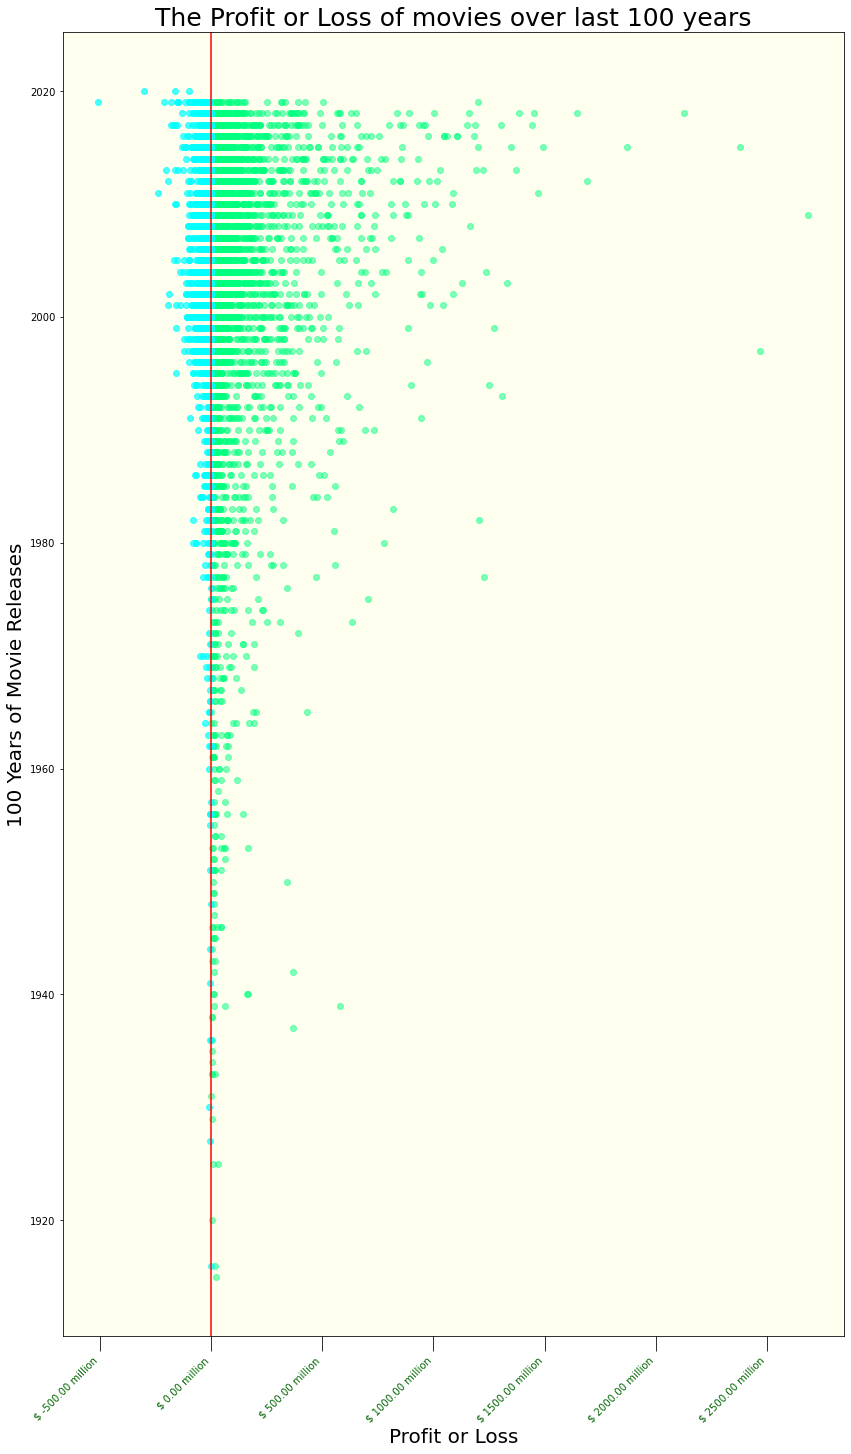

<Figure size 432x288 with 0 Axes>

In [109]:
fig, ax = plt.subplots(figsize=(14, 24))
ax.scatter(
    x=profit_freq['total_profit_loss']/1000000,
    y=profit_freq['year'],
    alpha=.5,
    color="springgreen")
ax.scatter(
    x=loss_freq['total_profit_loss']/1000000,
    y=loss_freq['year'],
    alpha=.7,
    color="cyan")
ax.set_facecolor("ivory")
labels = ax.get_xticklabels()
plt.setp(labels,
         rotation=45, 
         horizontalalignment='right')

# plt.xlim(-500000000, 2000000000)
# plt.xticks(range(-500000000, 2000000000, 85000000)) 

ax.xaxis.set_major_formatter('$ {x:1.2f} million')

ax.xaxis.set_tick_params(which='major', labelcolor='darkgreen', size=15,
                         labelleft=True, labelright=False)
ax.set_title('The Profit or Loss of movies over last 100 years', size=25)
# Add x label
ax.set_xlabel('Profit or Loss', size=20)
# Add y label
ax.set_ylabel('100 Years of Movie Releases', rotation=90, size=20)

plt.axvline(0, 0, 1, color='red')
plt.show()
plt.tight_layout();

In [72]:
# TN_clean_base['total_profit_loss'].min()

The first thing we need to do is sort the data by Month/year, and see what the most profitable time of the year to release movies.  We also want to get an idea on the frequency of profit/loss over time.   We have all the data from the TN set, and assuming we cannot add to that amount, this gives us the most data points to draw informative decisions.  So we might as well use the most data constructively.   

First, lets set up some masks.  

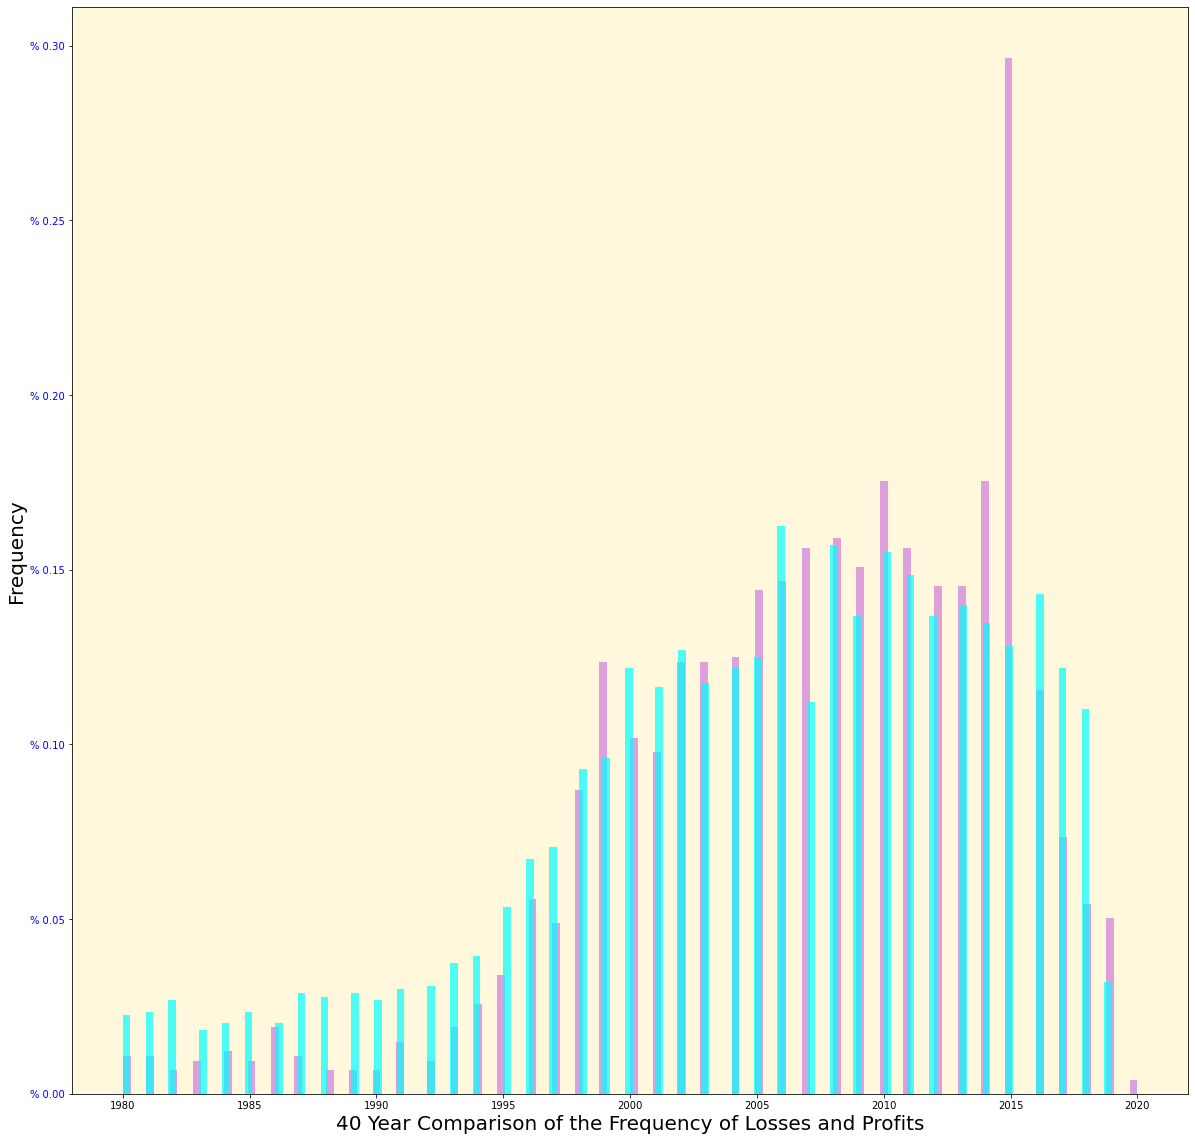

<Figure size 432x288 with 0 Axes>

In [73]:
fig, ax = plt.subplots(figsize=(20,20))

ax.hist(post_1980_loss_freq['year'], bins=130, color='plum', density=True)
ax.hist(post_1980_profit_freq['year'], bins=130, color='aqua', alpha=.7, density=True)
ax.set_facecolor("cornsilk")
ax.set_xlabel('40 Year Comparison of the Frequency of Losses and Profits', size=20)
ax.set_ylabel('Frequency', size=20)

ax.yaxis.set_major_formatter('% {x:1.2f}')
ax.yaxis.set_tick_params(which='major', labelcolor='blue',
                         labelleft=True, labelright=False)
plt.show()
plt.tight_layout();

This visual demonstrates the relative frequency of profit from 1980 until the present, and is consistent with our initial impressions; it confirms suspicians that the risk reward proposition in movie making changed sometime between 1995 and 2000.  This does not mean that movies did not remain a profitable venture, but prior to 1995, there was a greater frequency of profitible movies relative to the total percentage of all profitable movies ever made.  On the other hand, the great majority of losses ever sustained by the movie industry have been suffered between 2000 and 2020, with a staggering loss of nearly 30 percent of all losses ever in 2015.  While the movie industry may have printed money in the past, the value proposition is much more risky these days.

## What month is the best to make movies.   2000 - 2020
I think this next visual will help us determine the most profitalble month in which to release movies.  In addition, we will continue to shrink our time period, this time evaluating movies from 2000 to the present.   

In [80]:
# TN_clean_base[TN_clean_base['year'] == 2015].sort_values(by='total_profit_loss', ascending=False)
#Checking out Jupiter Ascending, perhaps the biggest example of lighting money on fire in movie history.  

In [81]:
# TN_clean_base[TN_clean_base.duplicated(['domestic_gross', 'foreign_gross'])]

In [82]:
# TN_clean_base[TN_clean_base.duplicated(['domestic_gross', 'foreign_gross'])].drop_duplicates(subset=['domestic_gross', 'foreign_gross'], keep='first', inplace = True)


In [83]:
# TN_clean_base[TN_clean_base.duplicated(['domestic_gross', 'foreign_gross'])].value_counts()

It sure looks like there are some duplicate values here.  This is 400 rows of data.  I am going to split the difference and assign half to each in an effort to preserve data.  

In [110]:
# now lets sort by month.  
# post_2000_profit_loss[post_2000_profit_loss.groupby(post_2000_profit_loss['release_date'].dt.month)['total_profit_loss']]
post_2000_profit_loss = TN_clean_base[TN_clean_base['year'] >= 2000]

In [74]:
post_2000_profit_loss['months'] = post_2000_profit_loss['release_date'].apply(lambda x:x.strftime('%B'))

NameError: name 'post_2000_profit_loss' is not defined

In [75]:
months_df = post_2000_profit_loss.groupby('months').mean().sort_values(by='total_profit_loss', ascending=False)

NameError: name 'post_2000_profit_loss' is not defined

In [76]:
months_df.info()

NameError: name 'months_df' is not defined

NameError: name 'months_df' is not defined

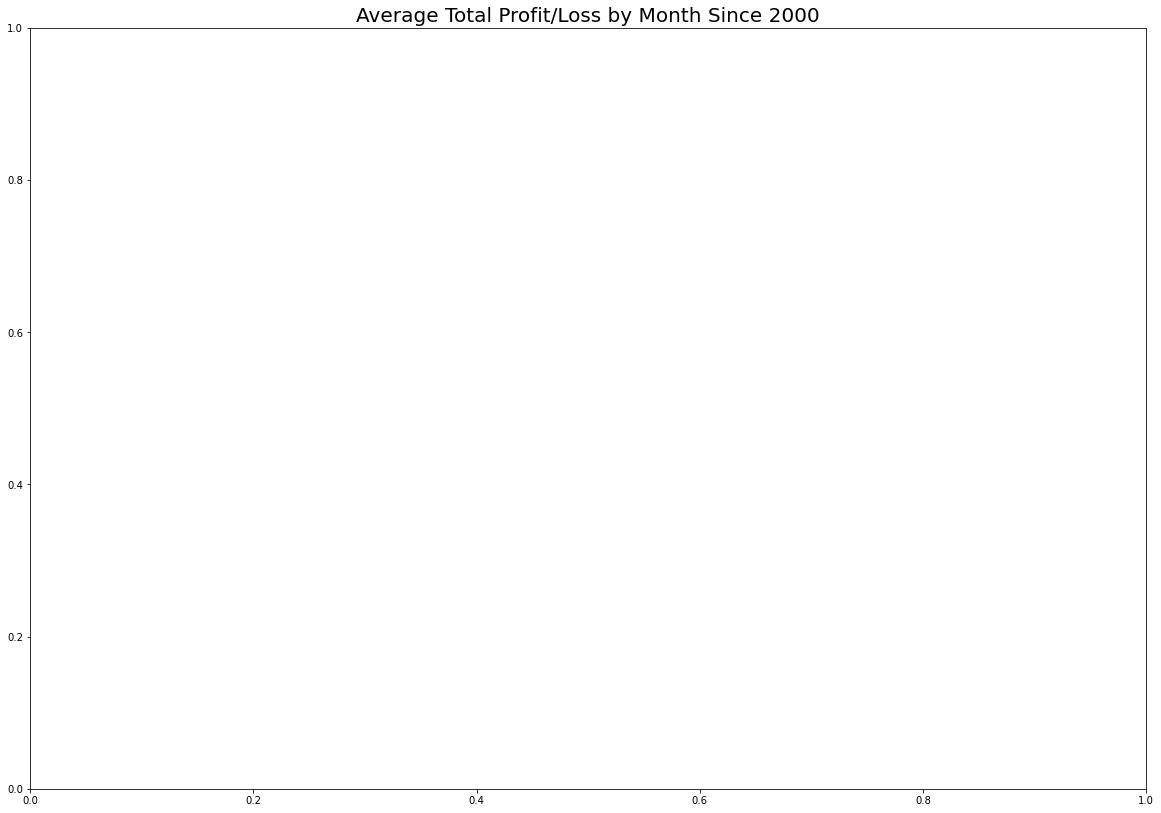

In [77]:
# Setting the figure size
plt.figure(figsize=[20,14]) 

# Visualizing using Bar Chart
plt.title("Average Total Profit/Loss by Month Since 2000", size=20)
plt.bar(x=months_df.index, height=months_df['total_profit_loss']/1000000, data=months_df)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['$ {:.0f} million'.format(x) for x in current_values])

plt.show()
plt.tight_layout();

In [78]:
below_95_profit = post_2000_profit_loss[post_2000_profit_loss['total_profit_loss'] 
                      <= post_2000_profit_loss['total_profit_loss'].quantile(.95)]

above_5_profit = post_2000_profit_loss[post_2000_profit_loss['total_profit_loss'] 
                      >= post_2000_profit_loss['total_profit_loss'].quantile(.5)]


NameError: name 'post_2000_profit_loss' is not defined

In [79]:
months_df_below_95 = below_95_profit.groupby('months').mean().sort_values(by='total_profit_loss', ascending=False)

NameError: name 'below_95_profit' is not defined

NameError: name 'months_df_below_95' is not defined

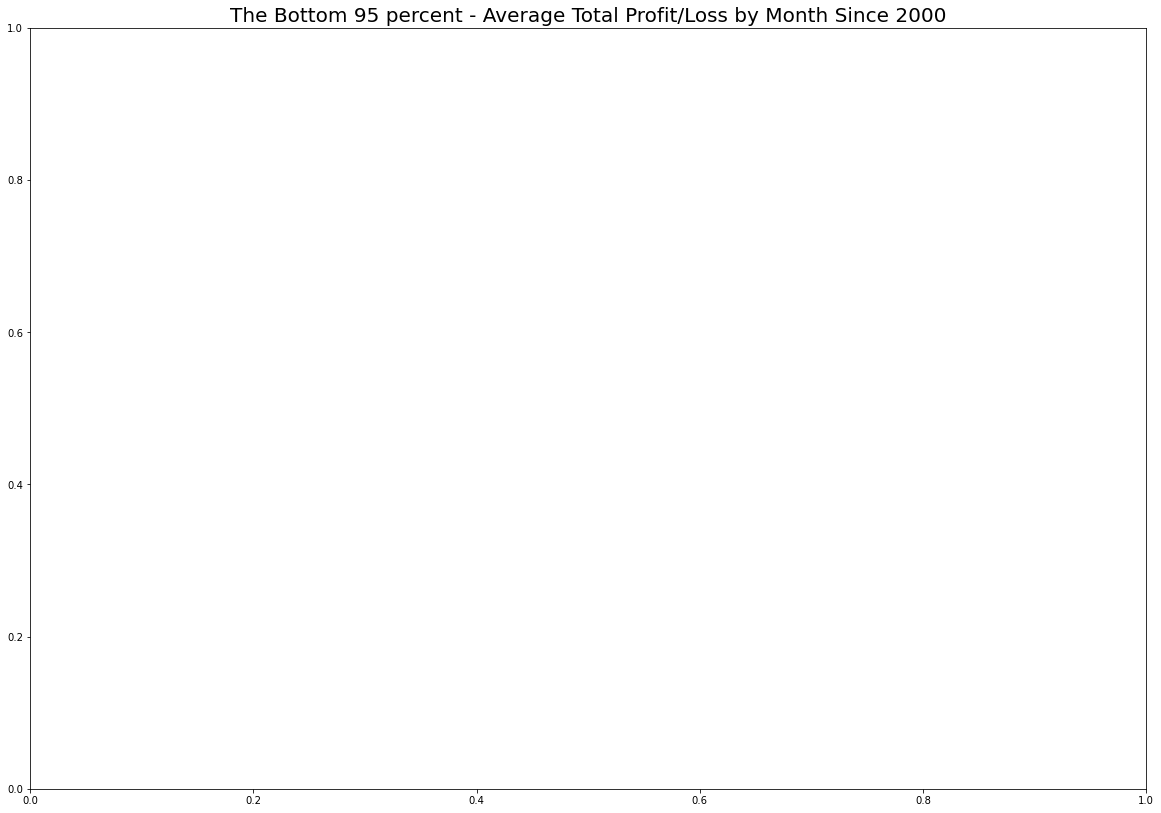

In [80]:
# Setting the figure size
plt.figure(figsize=[20,14]) 

# Visualizing using Bar Chart
plt.title("The Bottom 95 percent - Average Total Profit/Loss by Month Since 2000", size=20)
plt.bar(x=months_df_below_95.index, height=months_df_below_95['total_profit_loss']/1000000, data=months_df_below_95)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['$ {:.0f} millions'.format(x) for x in current_values])
plt.tight_layout()
plt.show();

The upper end outliers are extraordinary.  Those few movies are profiting nearly 3 times as much as anything in the bottom 95 percent of movies.  

## Cleaning BOM data

In [92]:
# bom_movie_gross.isna().any()

In [93]:
# bom_movie_gross.isna().value_counts()

In [94]:
# bom_movie_gross['year'] = bom_movie_gross['year'].astype(int)

In [95]:
# bom_movie_gross.rename(columns={'title' : 'movie'}, inplace=True)

In [96]:
# bom_movie_gross

In [97]:
# year_bom = bom_movie_gross.set_index('movie')
# year_bom.head()

In [98]:
# bom_movie_gross.drop(['studio'], axis=1)
# bom_movie_gross.head()

In [1057]:
# lets get some sample data of the NAs 
# bom_movie_gross['studio'].isna().sample(5)

In [1058]:
# bom_movie_gross[bom_movie_gross['studio'].isna()]

The only movie that gives me pause is Secret Super Star because 12.2 million is not chump change, but considering that the the Bollywood Indian film was the most highly profitable Bollywood film ever according to Latest Box Office, which is entirely devoted to the Bollywood genre.  There is some argument to MS carving a stake out in the Bollywood market as a long term business endeavor, if one assumes the Indian economy will one day become the largest in the world. However, for the purposes of this project, I don't think this is the market MS is looking to enter.  

UPDATE: we are using BOM later for the studio feature.  

In [1059]:
# bom_movie_gross.describe()

In [1060]:
# bom_movie_gross.dropna(subset=['studio'], inplace=True)

In [1061]:
# bom_movie_gross['studio'].isna().sum()

In [1062]:
# bom_movie_gross[bom_movie_gross['domestic_gross'].isna()]

## Concat TN and BOM 
lets first concat the TNclean and BOM sets.   

In [1063]:
# TNBOM_cat = pd.concat([TN_clean, bom_movie_gross], ignore_index=True)
# TNBOM_cat
# that almost seems easier than a merge  

In [1064]:
# TNBOM_cat.isna().sum()

114 million is a lot of revenue.   I dont think we can just ignore that kind of data.  Okay, so the mean domestic gross revenue is about 2.9 million and the standard deviation is 7 million.  Thats pretty wild, as someone I know might say.  

In [1065]:
# bom_movie_gross.domestic_gross.hist()

In [1066]:
# bom_movie_gross.quantile(q=.84)

In [1067]:
# TNBOM_cat['domestic_gross'] = TNBOM_cat['domestic_gross'].str.replace(',', '')
# TNBOM_cat['domestic_gross'] = TNBOM_cat['domestic_gross'].str.replace('$', '')
# TNBOM_cat['domestic_gross'] = TNBOM_cat['domestic_gross'].astype(float)

In [1068]:
# TNBOM_cat = TNBOM_cat['domestic_gross'].str.strip()

In [1069]:
# bom_movie_gross.columns = bom_movie_gross.columns.str.strip()

In [1070]:
# bom_movie_gross.rename(columns={'title' : 'movie'}, inplace=True)

In [1071]:
# TNBOM_cat[TNBOM_cat.duplicated(subset='movie')].count()

In [1072]:
# TNBOM_cat = TNBOM_cat.drop_duplicates(subset=['movie'], ignore_index=True)

In [1073]:
# TNBOM_cat[TNBOM_cat.duplicated(subset='movie')].count()

In [1074]:
# TNBOM_cat[TNBOM_cat['domestic_gross'].isna()]

## Combine TN and BOM

In [1075]:
#first we need to convert domestic_gross from an object to a float
# TN['domestic_gross'] = TN['domestic_gross'].astype(int)

In [1076]:
# TNBOM = TN.merge(bom_movie_gross, left_on='year', right_on='domestic_gross', how='outer')

In [1077]:
# TNBOM


In [1078]:
# TNBOM[TNBOM.duplicated(subset='movie_x']

In [1079]:
# rt_movie_info.info()

In [1080]:
# TMDB_RTs_BOM = TMDB.merge(RT_movie_info, on='release_date', how='left').merge(rt_budgets, on='' how='left').merge()

We are icing the above exploration of TN and BOM and using BOM for its studio feature.   

## SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [81]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


Then here is some starter code that reads one of the data tables from the database:

# IMDB database
We are going to use as little RAM as possible during this part because the SQL db takes a ton.  

In [82]:
import sqlite3

In [83]:
conn = sqlite3.connect("im.db")

In [104]:
movie_basics = pd.read_sql("""SELECT *
FROM movie_basics
;""", conn)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [1085]:

# principals = pd.read_sql("SELECT * FROM principals;", conn)
# principals

In [105]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [1087]:
# movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
# movie_ratings.info()

In [106]:
movie_akas = pd.read_sql("SELECT * FROM movie_akas;", conn)
movie_akas


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [1089]:
akas = pd.read_sql("SELECT  FROM movie_akas;", conn)


In [59]:
sql1 = pd.read_sql("""
SELECT *
FROM movie_basics as mb
    LEFT JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id 
    LEFT JOIN movie_akas as akas
        on mb.movie_id = akas.movie_id
""", conn)
sql1
sql1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,1.0,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,2.0,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,3.0,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,4.0,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,5.0,Sungharsh,IN,hi,None,alternative spelling,0.0


In [60]:
TN_clean_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5782 non-null   datetime64[ns]
 1   movie                 5782 non-null   object        
 2   production_budget     5782 non-null   int64         
 3   domestic_gross        5782 non-null   int64         
 4   foreign_gross         5782 non-null   int64         
 5   year                  5782 non-null   int64         
 6   domestic_profit_loss  5782 non-null   int64         
 7   foreign_profit_loss   5782 non-null   int64         
 8   total_gross           5782 non-null   int64         
 9   total_profit_loss     5782 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 496.9+ KB


In [61]:
sql1.rename(columns={'primary_title' : 'movie', 'start_year' : 'year' }, inplace=True)

once again, we rename some columns.  

In [62]:
sql1.head()

,movie_id,movie,original_title,year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,1.0,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,2.0,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,3.0,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,4.0,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,5.0,Sungharsh,IN,hi,None,alternative spelling,0.0


In [63]:
sql1.isna().sum()

movie_id                  0
movie                     0
original_title           32
year                      0
runtime_minutes       41326
genres                 6663
movie_id              89460
averagerating         89460
numvotes              89460
movie_id              23842
ordering              23842
title                 23842
region                77135
language             313830
types                187098
attributes           340620
is_original_title     23867
dtype: int64

In [64]:
sql1.dropna()

,movie_id,movie,original_title,year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,ordering,title,region,language,types,attributes,is_original_title


In [67]:
sql1 = sql1.drop_duplicates(subset=['movie_id'])
sql1.duplicated(['movie']).sum()

10073

In [68]:
sql1.head()

,movie_id,movie,original_title,year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,1.0,Sangharsh,IN,hi,None,alternative transliteration,0.0
5,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,1.0,One Day Before the Rainy Season,XWW,en,None,None,0.0
9,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,1.0,O Outro Lado do Vento,BR,None,imdbDisplay,None,0.0
22,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,1.0,Subse Bada Sukh,IN,bn,None,None,0.0
25,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,1.0,La Telenovela Errante,None,None,original,None,1.0


I suspect different genres are creating the duplicate titles.  

## Combining SQL and TN dataframes

we are going to merge the SQL set into our TN base set.  

In [106]:
TNSQL = pd.merge(TN_clean_base, sql1, left_on=['movie', 'year'], right_on=['movie', 'year'], how='left')

NameError: name 'sql1' is not defined

In [70]:
TNSQL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5845 entries, 0 to 5844
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5845 non-null   datetime64[ns]
 1   movie                 5845 non-null   object        
 2   production_budget     5845 non-null   int64         
 3   domestic_gross        5845 non-null   int64         
 4   foreign_gross         5845 non-null   int64         
 5   year                  5845 non-null   int64         
 6   domestic_profit_loss  5845 non-null   int64         
 7   foreign_profit_loss   5845 non-null   int64         
 8   total_gross           5845 non-null   int64         
 9   total_profit_loss     5845 non-null   int64         
 10  movie_id              1547 non-null   object        
 11  original_title        1547 non-null   object        
 12  runtime_minutes       1521 non-null   float64       
 13  genres            

now we clean the data

In [71]:
TNSQL.isna().sum()
# that is a lot of NAN values

release_date               0
movie                      0
production_budget          0
domestic_gross             0
foreign_gross              0
year                       0
domestic_profit_loss       0
foreign_profit_loss        0
total_gross                0
total_profit_loss          0
movie_id                4298
original_title          4298
runtime_minutes         4324
genres                  4304
movie_id                4347
averagerating           4347
numvotes                4347
movie_id                4306
ordering                4306
title                   4306
region                  4437
language                5610
types                   4787
attributes              5782
is_original_title       4306
dtype: int64

In [72]:
TNSQL.dropna()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss,...,averagerating,numvotes,movie_id,ordering,title,region,language,types,attributes,is_original_title


In [73]:
TNSQL.duplicated(subset=['movie', 'release_date']).sum()

63

In [74]:
TNSQL_clean = TNSQL.drop_duplicates(subset=['movie', 'release_date'])
TNSQL_clean.duplicated(['movie']).sum()

84

In [75]:
TNSQL_clean.isna().sum() 
# I may need to consider cleaning up the set before the merge.   

release_date               0
movie                      0
production_budget          0
domestic_gross             0
foreign_gross              0
year                       0
domestic_profit_loss       0
foreign_profit_loss        0
total_gross                0
total_profit_loss          0
movie_id                4298
original_title          4298
runtime_minutes         4315
genres                  4298
movie_id                4321
averagerating           4321
numvotes                4321
movie_id                4301
ordering                4301
title                   4301
region                  4423
language                5551
types                   4741
attributes              5722
is_original_title       4301
dtype: int64

## Merge TMDB

In [76]:
TMDB.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [77]:
TMDB.rename(columns={'title': 'movie'}, inplace=True)

In [78]:
TM_TB = TNSQL_clean.merge(TMDB, on=['movie', 'year', 'release_date'], how='left')

In [79]:
TM_TB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 5911
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5912 non-null   datetime64[ns]
 1   movie                 5912 non-null   object        
 2   production_budget     5912 non-null   int64         
 3   domestic_gross        5912 non-null   int64         
 4   foreign_gross         5912 non-null   int64         
 5   year                  5912 non-null   int64         
 6   domestic_profit_loss  5912 non-null   int64         
 7   foreign_profit_loss   5912 non-null   int64         
 8   total_gross           5912 non-null   int64         
 9   total_profit_loss     5912 non-null   int64         
 10  movie_id              1582 non-null   object        
 11  original_title_x      1582 non-null   object        
 12  runtime_minutes       1564 non-null   float64       
 13  genres            

In [80]:
TM_TB.isna().sum()

release_date               0
movie                      0
production_budget          0
domestic_gross             0
foreign_gross              0
year                       0
domestic_profit_loss       0
foreign_profit_loss        0
total_gross                0
total_profit_loss          0
movie_id                4330
original_title_x        4330
runtime_minutes         4348
genres                  4330
movie_id                4354
averagerating           4354
numvotes                4354
movie_id                4334
ordering                4334
title                   4334
region                  4462
language                5670
types                   4801
attributes              5851
is_original_title       4334
genre_ids               4512
id                      4512
original_language       4512
original_title_y        4512
popularity              4512
vote_average            4512
vote_count              4512
dtype: int64

In [81]:
TM_TB.dropna()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss,...,types,attributes,is_original_title,genre_ids,id,original_language,original_title_y,popularity,vote_average,vote_count


In [82]:
TM_TB.duplicated(subset=['movie', 'release_date']).sum()

130

### This is a such a small number that we are going to lose the 130. 

In [83]:
TM_TB = TM_TB.drop_duplicates(subset=['movie'])
TM_TB.duplicated(['movie']).sum()

0

In [84]:
TM_TB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5911
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5698 non-null   datetime64[ns]
 1   movie                 5698 non-null   object        
 2   production_budget     5698 non-null   int64         
 3   domestic_gross        5698 non-null   int64         
 4   foreign_gross         5698 non-null   int64         
 5   year                  5698 non-null   int64         
 6   domestic_profit_loss  5698 non-null   int64         
 7   foreign_profit_loss   5698 non-null   int64         
 8   total_gross           5698 non-null   int64         
 9   total_profit_loss     5698 non-null   int64         
 10  movie_id              1468 non-null   object        
 11  original_title_x      1468 non-null   object        
 12  runtime_minutes       1452 non-null   float64       
 13  genres            

In [85]:
# rt_movie_info.info()

In [1115]:
# Complete_TN = TM_TB.merge(rt_movie_info, on='release_date', how='left')

In [887]:
# Complete_TN.info()

In [888]:
# Complete_TN.isna().sum()

In [889]:
# Complete_TN.dropna()

In [890]:
# Complete_TN.duplicated(subset=['movie']).sum()

In [891]:
# DF1 = Complete_TN.drop_duplicates(subset=['movie'])
# DF1.duplicated().sum()

In [892]:
# DF1.info()

In [893]:
# DF1.isna().sum()

In [894]:
# DF1.dropna()

In [895]:
# DF1 = DF1.drop_duplicates(subset=['movie'])
# DF1.duplicated().sum()

In [896]:
# DF1.info()

## More SQL 
Now that we finally filled up several of our categories, I will focus on filling out a few of them in the TN dataset. The DF1 includes all the TN data, plus now we have almost 5177 writer values, 5270 director values, 5672 rating values, and 5672 genre values.   So, lets try and find the rest of the values in those categories.  

In [897]:
# principals.info()

In [898]:
# writers = pd.read_sql("SELECT * FROM writers;", conn)
# writers

In [899]:
# writers.info()

In [458]:
# known_for = pd.read_sql("SELECT * FROM known_for;", conn)
# known_for

In [901]:
# known_for.info()

In [459]:
# persons = pd.read_sql("SELECT * FROM persons;", conn)
# persons

In [460]:
# directors = pd.read_sql("SELECT * FROM directors;", conn)
# directors

In [461]:
# directors.info()

In [462]:
# SQL2 = pd.read_sql("""SELECT primary_profession, primary_title as movie
#     FROM persons as p
#         JOIN directors
#             USING(person_id) 
#         JOIN writers
#             USING(person_id)
#         JOIN movie_basics
#             using(movie_id)
#         JOIN known_for
#             using(movie_id)
#         JOIN principals
#             using(movie_id)
#     GROUP BY primary_profession
#     ORDER BY movie
# """, conn)
# SQL2.head()

In [463]:
# SQL2 = pd.read_sql("""
# SELECT primary_title as movie, person_id as director
# FROM principals as p
#     JOIN movie_basics as mb
#     WHERE category or job = 'director'
#     GROUP BY movie
#     ORDER BY director
#  """, conn)
# SQL2.info()

In [464]:
# SQLtest = pd.read_sql("""
# SELECT mb.primary_title as movie, d.person_id as director, w.person_id as writer
# FROM principals as p
#     JOIN movie_basics as mb
#         using(movie_id)
#     JOIN known_for
#         using(movie_id)
#     JOIN directors as d
#         using(person_id)
#     JOIN writers as w
#         using(person_id)
#     WHERE mb.movie_id = p.movie_id AND p.person_id = d.person_id or w.person_id
#     GROUP BY movie
#     ORDER BY director
#  """, conn)
# SQLtest.info()

In [86]:
SQL = pd.read_sql("""
SELECT mb.primary_title as movie, pe.primary_name as director, primary_profession, mb.genres, mb.start_year as year
FROM principals as p
    JOIN movie_basics as mb
        using(movie_id)
    JOIN known_for
        using(movie_id)
    JOIN directors as d
        using(person_id)
    JOIN persons as pe
        using(person_id)
    WHERE mb.movie_id = p.movie_id AND pe.person_id = d.person_id
    GROUP BY movie
    ORDER BY director
 """, conn)
SQL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124177 entries, 0 to 124176
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movie               124177 non-null  object
 1   director            124177 non-null  object
 2   primary_profession  123919 non-null  object
 3   genres              121562 non-null  object
 4   year                124177 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [162]:
SQLtest.isna()

,movie,director,primary_profession
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
124172,False,False,False
124173,False,False,False
124174,False,False,False
124175,False,False,False


In [107]:
TNSQL = pd.merge(TN_clean_base, SQLtest, left_on=['movie', 'year'], right_on=['movie', 'year'], how='inner')

KeyError: 'year'

That query takes a ton of juice to complete.   Waited almost 20 seconds.  

In [163]:
SQLtest.head()

,movie,director,primary_profession
0,Holidays,'Atlas' Ramachandran,"actor,director"
1,Príncipe Azteca,A Fernandez,director
2,Blood Freedom: Unchained Rebellion,A'Ali de Sousa,"actor,producer,writer"
3,Bullets Blades and Blood,A'Ali de Sousa,"actor,producer,writer"
4,The Heart of Amilcar Cabral,A'Ali de Sousa,"actor,producer,writer"


In [164]:
SQLtest.duplicated(subset='movie').sum()

0

now we merge the directors writers and movie data with our dataset. 

In [190]:
DF2 = TM_TB.merge(SQLtest, on='movie', how='left')
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5698 non-null   datetime64[ns]
 1   movie                 5698 non-null   object        
 2   production_budget     5698 non-null   int64         
 3   domestic_gross        5698 non-null   int64         
 4   foreign_gross         5698 non-null   int64         
 5   year                  5698 non-null   int64         
 6   domestic_profit_loss  5698 non-null   int64         
 7   foreign_profit_loss   5698 non-null   int64         
 8   total_gross           5698 non-null   int64         
 9   total_profit_loss     5698 non-null   int64         
 10  movie_id              1468 non-null   object        
 11  original_title_x      1468 non-null   object        
 12  runtime_minutes       1452 non-null   float64       
 13  genres            

In [234]:
DF2.isna().sum()

release_date               0
movie                      0
production_budget          0
domestic_gross             0
foreign_gross              0
year                       0
domestic_profit_loss       0
foreign_profit_loss        0
total_gross                0
total_profit_loss          0
movie_id                4230
original_title_x        4230
runtime_minutes         4246
genres                  4230
movie_id                4252
averagerating           4252
numvotes                4252
movie_id                4233
ordering                4233
title                   4233
region                  4354
language                5469
types                   4670
attributes              5638
is_original_title       4233
genre_ids               4438
id                      4438
original_language       4438
original_title_y        4438
popularity              4438
vote_average            4438
vote_count              4438
director                3424
primary_profession      3424
dtype: int64

In [235]:
DF2.dropna()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss,...,is_original_title,genre_ids,id,original_language,original_title_y,popularity,vote_average,vote_count,director,primary_profession


In [236]:
DF2.duplicated(subset=['movie', 'release_date']).sum()

0

In [237]:
DF3 = DF2.drop_duplicates(subset=['movie'])
DF3.duplicated().sum()

0

In [238]:
DF3.head()

,release_date,movie,production_budget,domestic_gross,foreign_gross,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss,...,is_original_title,genre_ids,id,original_language,original_title_y,popularity,vote_average,vote_count,director,primary_profession
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,335507625,2351345279,3536852904,2686852904,...,NaN,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,7.4,18676.0,Atsushi Wada,director
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,-169536125,635063875,1286727750,465527750,...,0.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571.0,Johnny Depp,"actor,producer,soundtrack"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-307237650,-200237650,192524700,-507475300,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simon Kinberg,"producer,writer,director"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,128405868,1072413963,1862019831,1200819831,...,0.0,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,7.3,13457.0,Chris Evans,"actor,producer,director"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,303181382,999721747,1936903129,1302903129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5698 non-null   datetime64[ns]
 1   movie                 5698 non-null   object        
 2   production_budget     5698 non-null   int64         
 3   domestic_gross        5698 non-null   int64         
 4   foreign_gross         5698 non-null   int64         
 5   year                  5698 non-null   int64         
 6   domestic_profit_loss  5698 non-null   int64         
 7   foreign_profit_loss   5698 non-null   int64         
 8   total_gross           5698 non-null   int64         
 9   total_profit_loss     5698 non-null   int64         
 10  movie_id              1468 non-null   object        
 11  original_title_x      1468 non-null   object        
 12  runtime_minutes       1452 non-null   float64       
 13  genres            

## Back to BOM 
There is a studio value here that is worth incorporating.  

In [376]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [377]:
bom_movie_gross.rename(columns={'title' : 'movie'}, inplace=True)

In [378]:
TNBOM = DF3.merge(bom_movie_gross, on=['movie', 'year'], how='left')

In [379]:
TNBOM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5698 non-null   datetime64[ns]
 1   movie                 5698 non-null   object        
 2   production_budget     5698 non-null   int64         
 3   domestic_gross_x      5698 non-null   int64         
 4   foreign_gross_x       5698 non-null   int64         
 5   year                  5698 non-null   int64         
 6   domestic_profit_loss  5698 non-null   int64         
 7   foreign_profit_loss   5698 non-null   int64         
 8   total_gross           5698 non-null   int64         
 9   total_profit_loss     5698 non-null   int64         
 10  movie_id              1468 non-null   object        
 11  original_title_x      1468 non-null   object        
 12  runtime_minutes       1452 non-null   float64       
 13  genres            

In [380]:
TNBOM.isna().sum()

release_date               0
movie                      0
production_budget          0
domestic_gross_x           0
foreign_gross_x            0
year                       0
domestic_profit_loss       0
foreign_profit_loss        0
total_gross                0
total_profit_loss          0
movie_id                4230
original_title_x        4230
runtime_minutes         4246
genres                  4230
movie_id                4252
averagerating           4252
numvotes                4252
movie_id                4233
ordering                4233
title                   4233
region                  4354
language                5469
types                   4670
attributes              5638
is_original_title       4233
genre_ids               4438
id                      4438
original_language       4438
original_title_y        4438
popularity              4438
vote_average            4438
vote_count              4438
director                3424
primary_profession      3424
studio        

In [381]:
TNBOM.dropna()

,release_date,movie,production_budget,domestic_gross_x,foreign_gross_x,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss,...,original_language,original_title_y,popularity,vote_average,vote_count,director,primary_profession,studio,domestic_gross_y,foreign_gross_y


In [382]:
TNBOM.duplicated(subset=['movie', 'year']).sum()

0

In [383]:
TNBOM = TNBOM.drop_duplicates(subset=['movie', 'year'])
TNBOM.duplicated().sum()

0

In [384]:
TNBOM.head()

,release_date,movie,production_budget,domestic_gross_x,foreign_gross_x,year,domestic_profit_loss,foreign_profit_loss,total_gross,total_profit_loss,...,original_language,original_title_y,popularity,vote_average,vote_count,director,primary_profession,studio,domestic_gross_y,foreign_gross_y
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,335507625,2351345279,3536852904,2686852904,...,en,Avatar,26.526,7.4,18676.0,Atsushi Wada,director,NaN,NaN,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,-169536125,635063875,1286727750,465527750,...,en,Pirates of the Caribbean: On Stranger Tides,30.579,6.4,8571.0,Johnny Depp,"actor,producer,soundtrack",BV,241100000.0,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-307237650,-200237650,192524700,-507475300,...,NaN,NaN,NaN,NaN,NaN,Simon Kinberg,"producer,writer,director",NaN,NaN,NaN
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,128405868,1072413963,1862019831,1200819831,...,en,Avengers: Age of Ultron,44.383,7.3,13457.0,Chris Evans,"actor,producer,director",BV,459000000.0,946400000
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,303181382,999721747,1936903129,1302903129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
TNBOM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          5698 non-null   datetime64[ns]
 1   movie                 5698 non-null   object        
 2   production_budget     5698 non-null   int64         
 3   domestic_gross_x      5698 non-null   int64         
 4   foreign_gross_x       5698 non-null   int64         
 5   year                  5698 non-null   int64         
 6   domestic_profit_loss  5698 non-null   int64         
 7   foreign_profit_loss   5698 non-null   int64         
 8   total_gross           5698 non-null   int64         
 9   total_profit_loss     5698 non-null   int64         
 10  genres                1468 non-null   object        
 11  director              2274 non-null   object        
 12  primary_profession    2274 non-null   object        
 13  studio            

Now we are going to cut down on the clutter and make the columns more manageable.

In [386]:
TNBOM.drop(TNBOM.iloc[:, 11:13], axis=1, inplace=True)

In [387]:
TNBOM.drop(TNBOM.iloc[:, 13:30], axis=1, inplace=True)

In [389]:
TNBOM.drop(TNBOM.iloc[:, 13:16], axis=1, inplace=True)

In [390]:
TNBOM.drop(TNBOM.iloc[:, 3:5], axis=1, inplace=True)

In [391]:
TNBOM.drop(TNBOM.iloc[:, 4:7], axis=1, inplace=True)

## Filter time 

In [392]:
TNBOM.info()
# must return to this point if we go outside genre director or studio universe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        5698 non-null   datetime64[ns]
 1   movie               5698 non-null   object        
 2   production_budget   5698 non-null   int64         
 3   year                5698 non-null   int64         
 4   total_profit_loss   5698 non-null   int64         
 5   genres              1468 non-null   object        
 6   director            2274 non-null   object        
 7   primary_profession  2274 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 400.6+ KB


In [393]:
TNBOM_clean = TNBOM[TNBOM['genres'].notna()]
# we start by reducing our universe to individual genres

In [394]:
TNBOM_clean.head()

,release_date,movie,production_budget,year,total_profit_loss,genres,director,primary_profession
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack"
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director"
3,2015-05-01,Avengers: Age of Ultron,330600000,2015,1200819831,"Action,Adventure,Sci-Fi",Chris Evans,"actor,producer,director"
6,2018-04-27,Avengers: Infinity War,300000000,2018,2126949682,"Action,Adventure,Sci-Fi",Mark Ruffalo,"actor,producer,director"
8,2017-11-17,Justice League,300000000,2017,284969504,"Action,Adventure,Fantasy",Ben Affleck,"producer,actor,writer"


In [395]:
TNBOM_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 1 to 5677
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        1468 non-null   datetime64[ns]
 1   movie               1468 non-null   object        
 2   production_budget   1468 non-null   int64         
 3   year                1468 non-null   int64         
 4   total_profit_loss   1468 non-null   int64         
 5   genres              1468 non-null   object        
 6   director            1467 non-null   object        
 7   primary_profession  1467 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 103.2+ KB


Without any more data to explore, its time to finalize visuals. I wish we had more data for some of the columns, but we can only work with what we have.  We have narrowed our universe down to directors and genres of movies.  

Will explore the (explode) method for the genres section and see if that adds to our analysis.  

SEE ANALYSIS AT END.


## RT Reviews comp to DF1 - ignore section

In [259]:
# rt_reviews

In [260]:
# grouped_rt = rt_reviews.groupby(['review', 'rating']).mean()
# grouped_rt.filter('')

In [261]:
# DF1.info()

## Scraping and API calls - ignore section 

In [262]:
# cols_to_keep = 
# from bs4 import BeautifulSoup
# import requests
# import numpy as np
# import pandas as pd
# import time

## More visuals

In [263]:
# TNBOM.info()

TNBOM.pivot_table index genre 
apply mask of 2000 - 2020 

In [264]:


# loss_freq = TN_clean_base[(TN_clean_base['total_profit_loss'] < 0)]
# profit_freq = TN_clean_base[(TN_clean_base['total_profit_loss'] >= 0)]
# loss_freq_adjusted = loss_freq[loss_freq['total_profit_loss'] <= loss_freq['total_profit_loss'].quantile(.95)]
# profit_freq_adjusted = profit_freq[profit_freq['total_profit_loss'] <= profit_freq['total_profit_loss'].quantile(.95)]
# post_1980_profit_freq = profit_freq[profit_freq['year'] >= 1980]
# post_1980_loss_freq = loss_freq[loss_freq['year'] >= 1980]

The first thing we need to do is reduce our universe of data so we can get rid of the NA values.  
Lets sort the data by writer, director and genre and see what we have left.   

In [265]:
# pd.explode()

In [396]:
TNBOM_clean.loc[:, 'genre_list'] = TNBOM_clean['genres'].str.split(',')
# now we split strings on the commas

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [397]:
# TNBOM.dropna()

In [398]:
# TNBOM_clean.loc[:, 'profession_list'] = TNBOM_clean['primary_profession'].str.split(',')

In [399]:
# TNBOM.info()

In [400]:
TNBOM_ex = TNBOM_clean.explode('genre_list') 
# we explode the genre universe
TNBOM_ex

,release_date,movie,production_budget,year,total_profit_loss,genres,director,primary_profession,genre_list
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Action
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Adventure
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Fantasy
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",Action
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",Adventure
...,...,...,...,...,...,...,...,...,...
5667,2015-12-01,Dutch Kills,25000,2015,-50000,"Crime,Drama,Thriller",Joseph Mazzella,"actor,producer,director",Thriller
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Drama
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Horror
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Thriller


In [401]:
# TNBOM_ex = TNBOM_clean.explode('profession_list') 
# # we explode the genre universe
# # TNBOM_ex

In [272]:
# TNBOM_explode = TNBOM_clean.explode('genre_list')

In [214]:
# TNBOM_explode[TNBOM_explode['genres'] == 'directors']

In [215]:
# TNBOM[TNBOM['genres'] == 'action']

In [216]:
# TNBOM_explode[TNBOM_explode['genres'] == 'Sci-Fi']

In [217]:
# TNBOM_explode[TNBOM_explode['genres'] == 'Drama']

In [218]:
# TNBOM_explode[TNBOM_explode['year'] == 2015].sort_values(by='total_profit_loss', ascending=False)

In [219]:
# TNBOM_explode['genres'].value_counts()

we want to see genres that were the most profitable and those that were the least profitable for the past 20 years.  
Then, we will look at the directors for those most profitable and those for the least profitable and see if there is any relationship.  

In [719]:
# months_df = post_2000_profit_loss.groupby('months').mean().sort_values(by='total_profit_loss', ascending=False)
# loss_freq = TN_clean_base[ TN_clean_base['total_profit_loss'] < 0]
# profit_freq = TN_clean_base[ TN_clean_base['total_profit_loss'] >= 0]
# loss_freq_adjusted = loss_freq[loss_freq['total_profit_loss'] <= loss_freq['total_profit_loss'].quantile(.95)]
# profit_freq_adjusted = profit_freq[profit_freq['total_profit_loss'] <= profit_freq['total_profit_loss'].quantile(.95)]
# post_1980_profit_freq = profit_freq[profit_freq['year'] >= 1980]
# post_1980_loss_freq = loss_freq[loss_freq['year'] >= 1980]
# below_95_profit = post_2000_profit_loss[post_2000_profit_loss['total_profit_loss'] 
#                       <= post_2000_profit_loss['total_profit_loss'].quantile(.90)]

# above_5_profit = post_2000_profit_loss[post_2000_profit_loss['total_profit_loss'] 
#                       >= post_2000_profit_loss['total_profit_loss'].quantile(.10)]


In [402]:
# we subset the last 10 years
post_2010_TNBOM = TNBOM_ex[TNBOM_ex['year'] >= 2000]

In [403]:
# top_genres = post_2010_TNBOM.sort_values(['genre_list', 'total_profit_loss'], ascending=False)
# top_genres['genre_list'].value_counts()

In [404]:
post_2010_TNBOM = post_2010_TNBOM[post_2010_TNBOM['genre_list'].notna()]

In [405]:
post_2010_TNBOM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 1 to 5677
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        3743 non-null   datetime64[ns]
 1   movie               3743 non-null   object        
 2   production_budget   3743 non-null   int64         
 3   year                3743 non-null   int64         
 4   total_profit_loss   3743 non-null   int64         
 5   genres              3743 non-null   object        
 6   director            3742 non-null   object        
 7   primary_profession  3742 non-null   object        
 8   genre_list          3743 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 292.4+ KB


In [356]:
profit_TNBOM_clean = post_2010_TNBOM[post_2010_TNBOM['total_profit_loss'] >= 0] #profit filter

In [357]:
loss_TNBOM_clean = post_2010_TNBOM[post_2010_TNBOM['total_profit_loss'] < 0] #loss filter

In [358]:
# post_2010_TNBOM['months'] = post_2010_TNBOM['release_date'].apply(lambda x:x.strftime('%B')) 

In [406]:
post_2010_TNBOM

,release_date,movie,production_budget,year,total_profit_loss,genres,director,primary_profession,genre_list
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Action
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Adventure
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Fantasy
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",Action
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",Adventure
...,...,...,...,...,...,...,...,...,...
5667,2015-12-01,Dutch Kills,25000,2015,-50000,"Crime,Drama,Thriller",Joseph Mazzella,"actor,producer,director",Thriller
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Drama
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Horror
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Thriller


In [508]:
# Prime_months_TNBOM = post_2010_TNBOM[
#                                     (post_2010_TNBOM['months'] == 'September', ''
# #                                     .mean().sort_values(by='total_profit_loss', ascending=False)]

In [509]:
# now we filter movies into a universe that contains director 
# directors_mask = post_2010_TNBOM_genre[post_2010_TNBOM_genre['genre_list'] == 'family'].sort_values(by='total_profit_loss', ascending=False)
# directors_mask 

In [206]:
# grouper = post_2010_TNBOM.groupby(['genre_list','movie'])

In [176]:
# post_2010_TNBOM.pivot_table(index='genre_list', columns='director', 
#                                values='total_profit_loss', aggfunc='mean').plot(kind='hist', 
#                                                                                figsize=(15,15))

In [152]:
# loss_TNBOM_clean.groupby(['genre_list','movies'])['total_profit_loss'].mean().sort_values(ascending=False)

In [179]:
# fig, ax = plt.subplots(figsize=(10, 5))
# for genre in profit_TNBOM_clean['genre_list'].unique():
#     subset_TNBOM = profit_TNBOM_clean[profit_TNBOM_clean['genre_list'] == genre]
#     x = subset_TNBOM['total_profit_loss']
#     y = subset_TNBOM['director']
    
#     #data: x is the horizontal axis and y is the vertical. 
#     ax.scatter(x, y)
#     ax.labels
# # Label your axes! ** always a good practice to include units of measurment with your axes labels.
# ax.set_ylabel('production budget')
# ax.set_xlabel('profit/loss')
# ax.set_title('Test')
# ax.legend();

In [510]:
# post_2010_TNBOM_genre = post_2010_TNBOM_genre[post_2010_TNBOM_clean['studio'].notna()]  
# studio universe within exploded genre universe, past 10

In [407]:
post_2010_TNBOM.duplicated(subset=['movie', 'release_date']).sum()

2275

In [408]:
post_2010_TNBOM = post_2010_TNBOM.drop_duplicates(subset=['movie', 'release_date'])
post_2010_TNBOM.duplicated(subset=['movie', 'release_date']).sum()

0

In [410]:
post_2010_TNBOM.isna().sum()

release_date          0
movie                 0
production_budget     0
year                  0
total_profit_loss     0
genres                0
director              1
primary_profession    1
genre_list            0
dtype: int64

In [411]:
post_2010_TNBOM['months'] = post_2010_TNBOM['release_date'].apply(lambda x:x.strftime('%B'))

/tmp/ipykernel_66/3446896454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2010_TNBOM['months'] = post_2010_TNBOM['release_date'].apply(lambda x:x.strftime('%B'))


In [412]:
post_2010_TNBOM

,release_date,movie,production_budget,year,total_profit_loss,genres,director,primary_profession,genre_list,months
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,"Action,Adventure,Fantasy",Johnny Depp,"actor,producer,soundtrack",Action,May
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,"Action,Adventure,Sci-Fi",Simon Kinberg,"producer,writer,director",Action,June
3,2015-05-01,Avengers: Age of Ultron,330600000,2015,1200819831,"Action,Adventure,Sci-Fi",Chris Evans,"actor,producer,director",Action,May
6,2018-04-27,Avengers: Infinity War,300000000,2018,2126949682,"Action,Adventure,Sci-Fi",Mark Ruffalo,"actor,producer,director",Action,April
8,2017-11-17,Justice League,300000000,2017,284969504,"Action,Adventure,Fantasy",Ben Affleck,"producer,actor,writer",Action,November
...,...,...,...,...,...,...,...,...,...,...
5660,2017-01-27,Emily,27000,2017,-46906,Drama,Timothy McNeil,"actor,director,writer",Drama,January
5664,2015-09-01,Exeter,25000,2015,439792,"Horror,Mystery,Thriller",Marcus Nispel,"director,producer,writer",Horror,September
5667,2015-12-01,Dutch Kills,25000,2015,-50000,"Crime,Drama,Thriller",Joseph Mazzella,"actor,producer,director",Crime,December
5674,2011-11-25,The Ridges,17300,2011,-34600,"Drama,Horror,Thriller",Robbie Barnes,"actress,director,editor",Drama,November


In [413]:

# post_2010_TNBOM.loc[post_2010_TNBOM['genre_list'], [] 
#                 df.loc[df['alcohol'], ['movies >50']]

In [414]:
filter_list = ['July', 'June', 'November', 'May']
profit_months = post_2010_TNBOM[post_2010_TNBOM['months'].isin(filter_list)]
table = profit_months.pivot_table(index='genre_list', columns='months', values='total_profit_loss', aggfunc='mean')

/tmp/ipykernel_66/4149460561.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['$ {:.0f} millions'.format(x) for x in current_values])


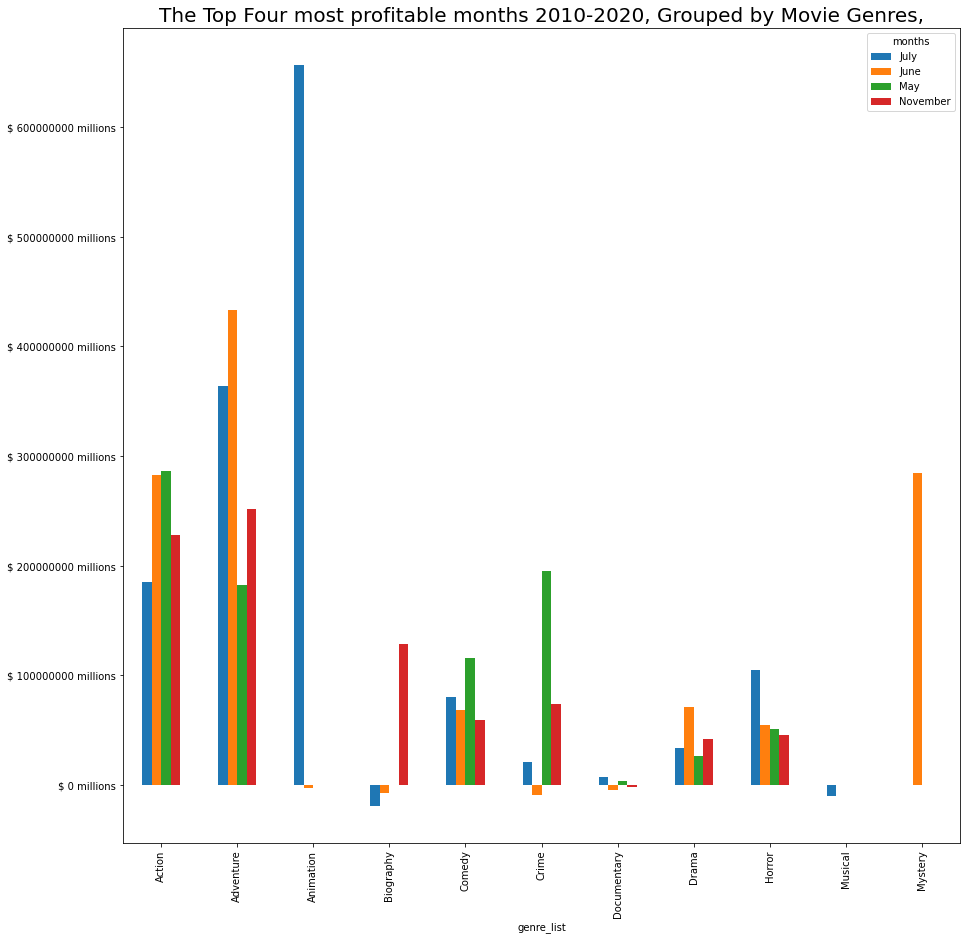

<Figure size 432x288 with 0 Axes>

In [443]:
table.plot(kind='bar', figsize=(15,15))
plt.title("The Top Four most profitable months 2010-2020, Grouped by Movie Genres,", size=20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['$ {:.0f} millions'.format(x) for x in current_values])
plt.show(),
plt.tight_layout();

Now, we know that the most profitable movie genres released in the most profitable months of the year, on average, are Animation movies released in July and Adventure movies released in June.  Therefore, the logical next analysis would be to subset the dataframe by Adventure and Animation movies, looking at directors of any of those types of movies that average the most profit, regardless of month, as we want to keep our analysis high level.   

In [444]:
genre_list = ['Animation', 'Adventure', 'Mystery', 'Action']
genre_filter = post_2010_TNBOM[post_2010_TNBOM['genre_list'].isin(genre_list)]
genre_filter

,release_date,movie,production_budget,year,total_profit_loss,genres,director,primary_profession,genre_list,months
14,2010-11-24,Tangled,260000000,2010,267299176,"Adventure,Animation,Comedy",Nathan Greno,"actor,art_department,director",Adventure,November
18,2012-12-14,The Hobbit: An Unexpected Journey,250000000,2012,820007136,"Adventure,Family,Fantasy",Andy Serkis,"actor,producer,soundtrack",Adventure,December
20,2013-12-13,The Hobbit: The Desolation of Smaug,250000000,2013,718733710,"Adventure,Fantasy",Peter Jackson,"producer,director,writer",Adventure,December
21,2014-12-17,The Hobbit: The Battle of the Five Armies,250000000,2014,700697409,"Adventure,Fantasy",Peter Jackson,"producer,director,writer",Adventure,December
45,2016-06-17,Finding Dory,200000000,2016,1107510754,"Adventure,Animation,Comedy",Andrew Stanton,"writer,actor,producer",Adventure,June
...,...,...,...,...,...,...,...,...,...,...
4955,2012-06-27,Beasts of the Southern Wild,1800000,2012,32460878,"Adventure,Drama,Fantasy",Benh Zeitlin,"director,writer,composer",Adventure,June
5047,2011-06-03,The Lion of Judah,1500000,2011,-3000000,Animation,Deryck Broom,"producer,director,writer",Animation,June
5234,2015-12-31,Karachi se Lahore,1000000,2015,-1982279,"Adventure,Comedy,Family",Wajahat Rauf,"producer,director,actor",Adventure,December
5315,2014-12-31,Destiny,750000,2014,-1499550,"Adventure,Comedy,Family",Sardar Shafai,"director,actor,writer",Adventure,December


In [445]:
genre_filter.head(20)

,release_date,movie,production_budget,year,total_profit_loss,genres,director,primary_profession,genre_list,months
14,2010-11-24,Tangled,260000000,2010,267299176,"Adventure,Animation,Comedy",Nathan Greno,"actor,art_department,director",Adventure,November
18,2012-12-14,The Hobbit: An Unexpected Journey,250000000,2012,820007136,"Adventure,Family,Fantasy",Andy Serkis,"actor,producer,soundtrack",Adventure,December
20,2013-12-13,The Hobbit: The Desolation of Smaug,250000000,2013,718733710,"Adventure,Fantasy",Peter Jackson,"producer,director,writer",Adventure,December
21,2014-12-17,The Hobbit: The Battle of the Five Armies,250000000,2014,700697409,"Adventure,Fantasy",Peter Jackson,"producer,director,writer",Adventure,December
45,2016-06-17,Finding Dory,200000000,2016,1107510754,"Adventure,Animation,Comedy",Andrew Stanton,"writer,actor,producer",Adventure,June
46,2010-06-18,Toy Story 3,200000000,2010,1083884402,"Adventure,Animation,Comedy",Tom Hanks,"producer,actor,soundtrack",Adventure,June
50,2010-03-05,Alice in Wonderland,200000000,2010,959682220,"Adventure,Family,Fantasy",Giuseppe Malpasso,"cinematographer,editor,director",Adventure,March
52,2013-06-21,Monsters University,200000000,2013,612076658,"Adventure,Animation,Comedy",Dan Scanlon,"writer,art_department,director",Adventure,June
53,2013-03-08,Oz the Great and Powerful,200000000,2013,325130047,"Adventure,Family,Fantasy",James Franco,"actor,producer,director",Adventure,March
56,2011-06-24,Cars 2,200000000,2011,351606258,"Adventure,Animation,Comedy",John Lasseter,"producer,writer,director",Adventure,June


we should explode the primary profession column and then filter by directors who are not also actors.  

In [462]:
genres_gonedf = post_2010_TNBOM.drop('genres', axis=1)

In [463]:
genres_gonedf.loc[:, 'profession_list'] = genres_gonedf['primary_profession'].str.split(',')

In [464]:
genres_gonedf

,release_date,movie,production_budget,year,total_profit_loss,director,primary_profession,genre_list,months,profession_list
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,"actor,producer,soundtrack",Action,May,"[actor, producer, soundtrack]"
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,Simon Kinberg,"producer,writer,director",Action,June,"[producer, writer, director]"
3,2015-05-01,Avengers: Age of Ultron,330600000,2015,1200819831,Chris Evans,"actor,producer,director",Action,May,"[actor, producer, director]"
6,2018-04-27,Avengers: Infinity War,300000000,2018,2126949682,Mark Ruffalo,"actor,producer,director",Action,April,"[actor, producer, director]"
8,2017-11-17,Justice League,300000000,2017,284969504,Ben Affleck,"producer,actor,writer",Action,November,"[producer, actor, writer]"
...,...,...,...,...,...,...,...,...,...,...
5660,2017-01-27,Emily,27000,2017,-46906,Timothy McNeil,"actor,director,writer",Drama,January,"[actor, director, writer]"
5664,2015-09-01,Exeter,25000,2015,439792,Marcus Nispel,"director,producer,writer",Horror,September,"[director, producer, writer]"
5667,2015-12-01,Dutch Kills,25000,2015,-50000,Joseph Mazzella,"actor,producer,director",Crime,December,"[actor, producer, director]"
5674,2011-11-25,The Ridges,17300,2011,-34600,Robbie Barnes,"actress,director,editor",Drama,November,"[actress, director, editor]"


In [481]:
prof_explode = genres_gonedf.explode('profession_list') 
# we explode the genre universe
prof_explode

,release_date,movie,production_budget,year,total_profit_loss,director,primary_profession,genre_list,months,profession_list
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,"actor,producer,soundtrack",Action,May,actor
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,"actor,producer,soundtrack",Action,May,producer
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,"actor,producer,soundtrack",Action,May,soundtrack
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,Simon Kinberg,"producer,writer,director",Action,June,producer
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,Simon Kinberg,"producer,writer,director",Action,June,writer
...,...,...,...,...,...,...,...,...,...,...
5674,2011-11-25,The Ridges,17300,2011,-34600,Robbie Barnes,"actress,director,editor",Drama,November,director
5674,2011-11-25,The Ridges,17300,2011,-34600,Robbie Barnes,"actress,director,editor",Drama,November,editor
5677,2014-12-31,Stories of Our Lives,15000,2014,-30000,Jim Chuchu,"director,writer,editor",Drama,December,director
5677,2014-12-31,Stories of Our Lives,15000,2014,-30000,Jim Chuchu,"director,writer,editor",Drama,December,writer


In [482]:
professionsgone = prof_explode.drop('primary_profession', axis=1)

In [483]:
professionsgone.isna().sum()

release_date         0
movie                0
production_budget    0
year                 0
total_profit_loss    0
director             1
genre_list           0
months               0
profession_list      1
dtype: int64

In [477]:
professionsgone

,release_date,movie,production_budget,year,total_profit_loss,director,genre_list,months,profession_list
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,Action,May,actor
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,Action,May,producer
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,2011,465527750,Johnny Depp,Action,May,soundtrack
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,Simon Kinberg,Action,June,producer
2,2019-06-07,Dark Phoenix,350000000,2019,-507475300,Simon Kinberg,Action,June,writer
...,...,...,...,...,...,...,...,...,...
5674,2011-11-25,The Ridges,17300,2011,-34600,Robbie Barnes,Drama,November,director
5674,2011-11-25,The Ridges,17300,2011,-34600,Robbie Barnes,Drama,November,editor
5677,2014-12-31,Stories of Our Lives,15000,2014,-30000,Jim Chuchu,Drama,December,director
5677,2014-12-31,Stories of Our Lives,15000,2014,-30000,Jim Chuchu,Drama,December,writer


In [484]:
professionsgone['director'].fillna(professionsgone['director'].mode()[0], inplace=True)

In [486]:
professionsgone['profession_list'].fillna(professionsgone['profession_list'].mode()[0], inplace=True)

In [487]:
professionsgone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 1 to 5677
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4346 non-null   datetime64[ns]
 1   movie              4346 non-null   object        
 2   production_budget  4346 non-null   int64         
 3   year               4346 non-null   int64         
 4   total_profit_loss  4346 non-null   int64         
 5   director           4346 non-null   object        
 6   genre_list         4346 non-null   object        
 7   months             4346 non-null   object        
 8   profession_list    4346 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 339.5+ KB


In [488]:
# directors_filled

In [ ]:
# post_2010_TNBOM.loc[post_2010_TNBOM['director'] == ('].sort_values(by='total_profit_loss', ascending=False)

## ONE DATASET TO RULE THEM ALL


For the initial visual, we used data from the The Numbers ('TN') dataset, which was determined to be identical to the RT_budgets_dataset('Budgets').  This analysis utilizes the TN sample universe of data as the primary model for showing profit accross the movie industry.  The TN dataset contains 5698 unique movie titles, spanning nearly 100 years.  With features such as the release date, budget, domestic gross and foreign gross, it was easy to map profitability for the industry using a sizable sample over a large section of time.  

### MOVIES STILL MAKE MONEY?   
Initial impressions are surprising, as data shows that the movie industry is still more profitable than not, on average, right up through 2020. Movies did seem to become riskier value proposition around the 1990/1995 time period.  Losses do seem to have a consistent limited upper range; however, and profitability varied greatly on the positive side of the spectrum.

## THE LONG SHADOW OF THE COVID EFFECT 
It is noticeable that 2020 and beyond contains relatively few datapoints.  The few movies shown on the inital scatterplot suggest that each of the few movies released in 2020 suffered terrible losses.  As this coincided with the Covid 19 pandemic, some serious questions arise about the reliability of this historical analysis. Can we still consider these numbers predictive if the movie industry itself went through a paradigmn shift as a result of the pandemic? Will results from 2021 and 2022 regress to the mean?  This is a discussion I will return to during my final evaluation, though it is beyond the scope of this analysis.   

#### (visual 2.1)
This analysis will construct a relative frequency model of profit over time.  This visual should be helpful in showing whether movies produced in the last 20 years are actually as profitable as they were in the 60s, 70s, and 80s on a relative basis. 

The relative frequency of profit shows that the losses signficantly outstripped movies that made money between the period 2000 and 2020.  A complete analysis is framed under the visual which I will link to in the final notebook.  

This changes some of my intentions with regard to the final visual.  I may seek to understand why the industry rebounded to profitability between 2016 and 2018, where profits topped losses.   Perhaps focusing on that time period in contrast to the time bewteen 2008 and 2015 will shed light on some changes that took place.  

#### Visual 3.1, 3.2, and 3.3
I am going to focus on directors and writers that were part of profitable ventures between 2000 and 2020 and see if there is some actionable insight that can be gained.  




At the end, it is always a best practice to close the connection to the database.

In [88]:
conn.close()